In [15]:
import torch
import torch.nn.functional as F
from basic import (log_variational_per_scalar, 
                         log_variational_per_vector, 
                         sample_variational_scalars, 
                         sample_variational_vectors,
                         log_prior_per_scalar, 
                         log_prior_per_vector,)
import matplotlib.pyplot as plt

### `log_variational_per_scalar()`

torch.Size([1000, 3])


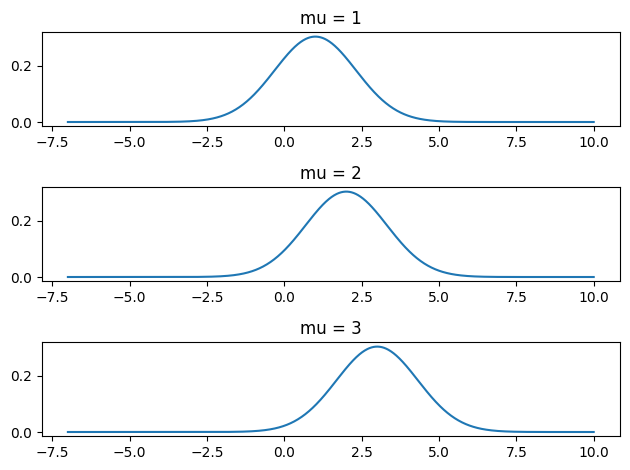

In [35]:
# Three separate univariate Gaussians
mus = torch.tensor([1., 2., 3.])
rhos = torch.tensor([1., 1., 1.])

# Varying scalar weight values 
weights = torch.linspace(-7, 10, 1000)

log_probs = torch.stack(
        [log_variational_per_scalar(weights[i].repeat(3), mus, rhos) for i in range(len(weights))]
        )

print(log_probs.shape)

fig, (ax0, ax1, ax2) = plt.subplots(3, 1)
ax0.plot(weights, torch.exp(log_probs[:, 0]))
ax0.set_title("mu = 1")
ax1.plot(weights, torch.exp(log_probs[:, 1]))
ax1.set_title("mu = 2")
ax2.plot(weights, torch.exp(log_probs[:, 2]))
ax2.set_title("mu = 3")
plt.tight_layout()

### `log_variational_per_vector()`

In [41]:
# 3, 2-dimensional multivariate gaussians
# N = 3, D = 2
mus = torch.tensor(
    [[1., 2.],
    [5., 6.],
    [1., 8.]])

rhos = torch.tensor(
    [[5., 1.],
    [3., 3.],
    [7., 2.]]
)

weights = torch.linspace(-15, 15, 1000).repeat(6).reshape(3, 2, 1000)

mus.shape, rhos.shape, weights.shape

(torch.Size([3, 2]), torch.Size([3, 2]), torch.Size([3, 2, 1000]))